In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Few command to make the plot nicer 
# (use latex for typesetting and bigger fonts)
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
mpl.rc('font', size = '14')
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 


In [10]:
#set this directory to where the files you want to analyze are
dir = "./outputs/"

# Scale factor $a(\tilde\eta)$

The file contains the following columns:

$\tilde\eta$ | $a$ | $a'$ | $\frac{a'}{a}$

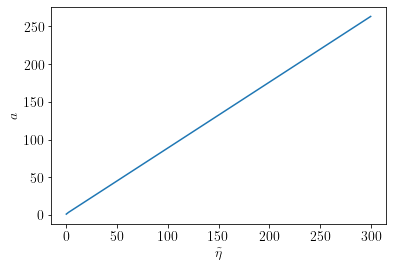

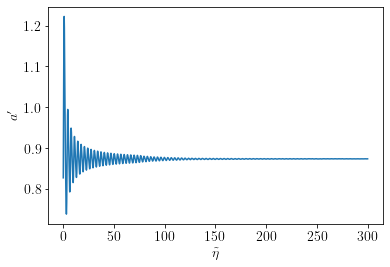

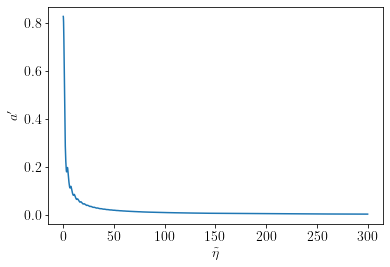

In [11]:
# load the file in aDat
aDat = np.loadtxt(dir + "average_scale_factor.txt")

#plot a
plt.figure(0)
plt.plot(aDat[:,0], aDat[:,1])
plt.ylabel("$a$")
plt.xlabel('$\\tilde\eta$')

#plot a'
plt.figure(1)
plt.plot(aDat[:,0], aDat[:,2])
plt.ylabel("$a'$")
plt.xlabel('$\\tilde\eta$')


#plot a'/a
plt.figure(2)
plt.plot(aDat[:,0], aDat[:,3])
plt.ylabel("$a'$")
plt.xlabel("$\\tilde\eta$");

# Volume average of fields

The files for the averages of the scalar fields contain the following columns:

$\eta$ | $\langle \tilde\phi_n \rangle$ | $\langle \tilde\phi'_n \rangle$ | $\langle \tilde\phi^2_n \rangle$ | $\langle \tilde\phi^{'2}_n \rangle$ | $\mathrm{rms}(\tilde\phi_n) $ | $\mathrm{rms}(\tilde\phi'_n) $

In [8]:
# Define a function for the plots, as we are gonna do 
# the same for both fields
def plot_fld(fldDat, aDat, fldNum=""):
    plt.figure(0)
    plt.plot(fldDat[:,0], fldDat[:,1])
    plt.xlabel("$\\tilde\eta$")
    plt.ylabel("$\langle\phi_"+ fldNum +"\\rangle$")
    
    plt.figure(1)
    plt.plot(fldDat[:,0], aDat[:,1] * fldDat[:,1])
    plt.xlabel("$\\tilde\eta$")
    plt.ylabel("$a\cdot\langle\phi_"+ fldNum +" \\rangle$")

    plt.figure(2)
    plt.plot(fldDat[:,0], aDat[:,1] * fldDat[:,5])
    plt.xlabel("$\\tilde\eta$")
    plt.ylabel("$a\cdot\mathrm{rms}(\phi_"+ fldNum +")$")
    plt.yscale('log')



## Field $0$ (inflaton)

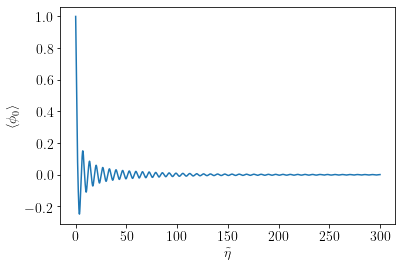

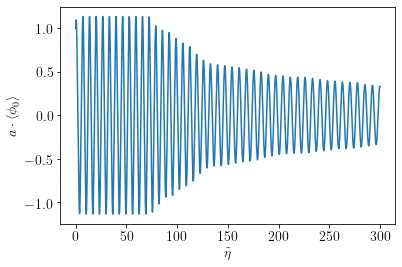

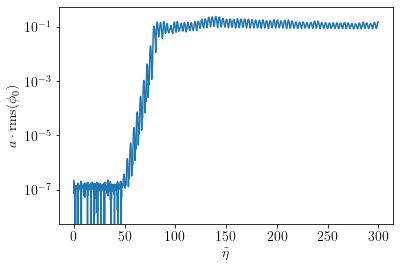

In [12]:
infDat = np.loadtxt(dir + "average_scalar_0.txt")
plot_fld(infDat, aDat,"0")

## Field $1$ (daughter field)

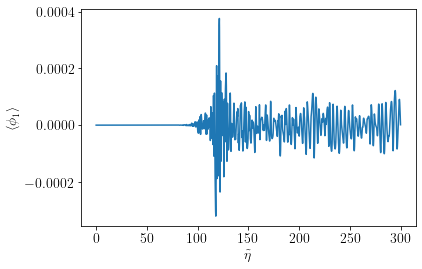

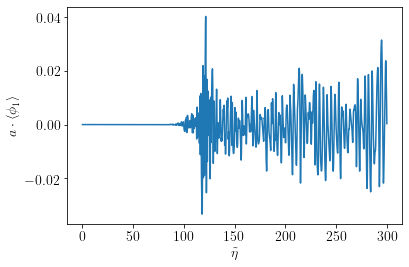

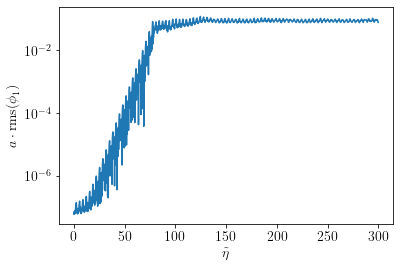

In [13]:
dauDat = np.loadtxt(dir + "average_scalar_1.txt")
plot_fld(dauDat, aDat, "1")

# "Energy conservation" (the $1^{st}$ Friedmann's equation is satisfied)

The file  that checks the first Friedmann's equation contains

$\tilde\eta$ | $\frac{\langle LHS - RHS\rangle}{\langle LHS + RHS\rangle}$ | $\langle LHS \rangle$ | $\langle RHS \rangle$ 

(1e-08, 0.01)

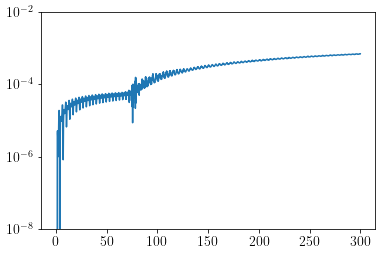

In [14]:
enConsDat = np.loadtxt(dir + "average_energy_conservation.txt")
plt.plot(enConsDat[:,0], enConsDat[:,1])
plt.yscale('log')
plt.ylim([1e-8,0.01])

# Energy densities

The file with the energy densities contains

$\tilde\eta$ | $\tilde E_K^{(0)}$ | $\tilde E_G^{(0)}$ |$\dots$| $\tilde E_K^{(N_s-1)}$ | $\tilde E_G^{(N_s-1)}$ |  $\tilde E_V^{(0)}$ | $\dots$ |  $\tilde E_V^{(N_p-1)}$ | $\langle \tilde \rho \rangle$

Text(0, 0.5, "$\\langle \\rho's\\rangle$")

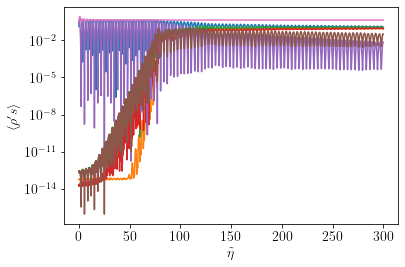

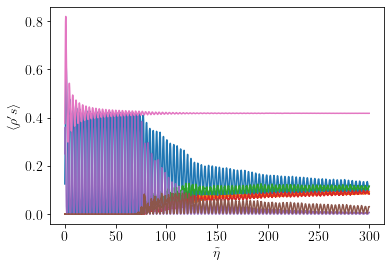

In [15]:
enDat = np.loadtxt(dir + "average_energies.txt")

nColumns = np.shape(enDat)[1]

# set explicitly different colors, so we know who is who
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink"]

plt.figure(0)
for i in range(1,nColumns):
    plt.plot(enDat[:,0], aDat[:,1]**4 * enDat[:,i], color = colors[i-1])
plt.yscale('log')
plt.xlabel("$\\tilde \eta$")
plt.ylabel("$\langle \\rho's\\rangle$")

plt.figure(1)
for i in range(1,nColumns):
    plt.plot(enDat[:,0], aDat[:,1]**4 * enDat[:,i], color = colors[i-1])
plt.xlabel("$\\tilde \eta$")
plt.ylabel("$\langle \\rho's\\rangle$")


# Spectra

Spectra output varies depending on the option. The default one generates a txt file with the following columns:

$\tilde k$ | $\tilde\Delta_{\tilde\phi}$ | $\tilde\Delta_{\tilde\phi'}$ | $\tilde n_{\tilde\phi}$ | bin multiplicity

In [16]:
def load_spectrum(filename, comment = '#'):
    # The next few lines open the file and count
    # how many bins in one spectrum
    file = open(filename)
    nBins = 0
    # read first line
    line = file.readline()
    # while no blank we continue
    while line != "\n":
        # if not a comment line (header for instance)
        # we count one line
        if(line[0] != comment):
            nBins +=1
        # read next line
        line = file.readline()
    file.close()

    # now we know nBins. We still need to actually read the data.
    fileSp = np.loadtxt(filename, comments=comment)

    # find how many spectra are in the files
    nSpectra = len(fileSp) / nBins

    return fileSp, int(nBins), int(nSpectra)


def plot_spectrum(spectra, column, nBins, nSpectra, colormap = 'plasma'):
    colors = plt.get_cmap(colormap)
    for i in range(nSpectra):
        plt.plot(spectra[i*nBins:(i+1)*nBins,0], spectra[i*nBins:(i+1)*nBins,column], color=colors(i/nSpectra))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$\\tilde k$')

## Inflaton

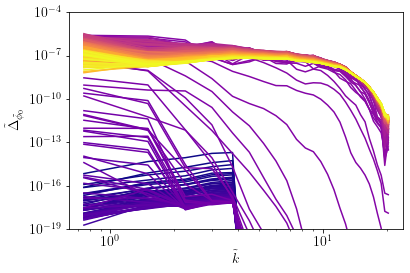

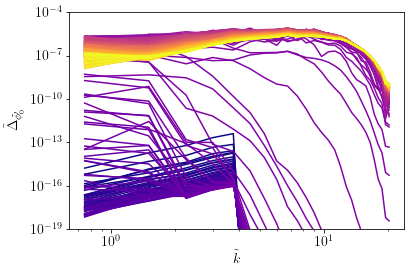

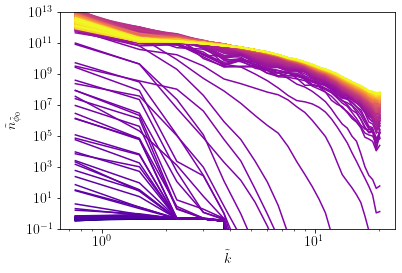

In [17]:
infSp, nBins, nSpectra = load_spectrum(dir + "spectra_scalar_0.txt")

plt.figure(0)
plot_spectrum(infSp, 1,  nBins, nSpectra)
plt.ylabel('$\\tilde\Delta_{\\tilde\phi_0}$')
plt.ylim([1e-19,1e-4])

plt.figure(1)
plot_spectrum(infSp, 2,  nBins, nSpectra)
plt.ylabel('$\\tilde\Delta_{\\tilde\phi_0\'}$')
plt.ylim([1e-19,1e-4])

plt.figure(2)
plot_spectrum(infSp, 3,  nBins, nSpectra)
plt.ylabel('$\\tilde n_{\\tilde\phi_0}$')
plt.ylim([1e-1,1e13]);

## Daughter field

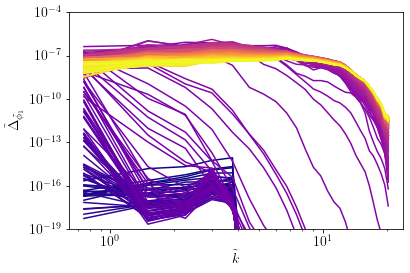

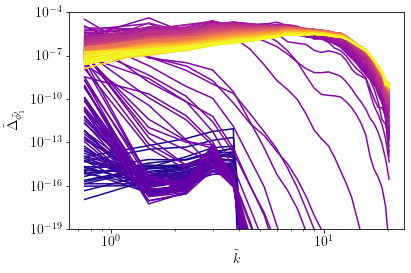

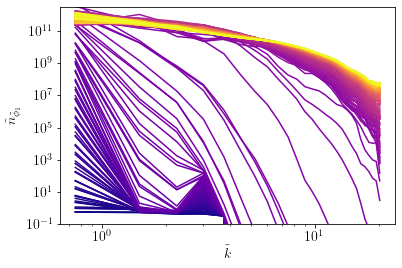

In [18]:
infSp, nBins, nSpectra = load_spectrum(dir + "spectra_scalar_1.txt")

plt.figure(0)
plot_spectrum(infSp, 1,  nBins, nSpectra)
plt.ylabel('$\\tilde\Delta_{\\tilde\phi_1}$')
plt.ylim([1e-19,1e-4])

plt.figure(1)
plot_spectrum(infSp, 2,  nBins, nSpectra)
plt.ylabel('$\\tilde\Delta_{\\tilde\phi_1\'}$')
plt.ylim([1e-19,1e-4])

plt.figure(2)
plot_spectrum(infSp, 3,  nBins, nSpectra)
plt.ylabel('$\\tilde n_{\\tilde\phi_1}$')
plt.ylim([1e-1,3e12]);